In [17]:
# import packages
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

In [172]:
df = pd.read_csv('pca_concat2.csv')
df

,Unnamed: 0,seqname,source,feature,start,end,strand,ref_gene_id,reference_id,filename,...,ref_UTR_length,UTR_diff,UTR_length (ln),UTR_type,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,41.0,chr19,StringTie,transcript,17292131,17303425,-,ABHD8,NM_024527.5,SRR19969211,...,530,0,6.272877,no change,416.658221,-0.439471,0.113285,-3.879331,1.047441e-04,2.943801e-03
1,63.0,chr1,StringTie,transcript,159204875,159206500,+,ACKR1,NM_002036.4,SRR19969208,...,50,0,3.912023,no change,1384.593000,-3.067104,0.618314,-4.960433,7.033622e-07,5.469974e-05
2,73.0,chr2,StringTie,transcript,264947,272481,+,ACP1,NM_001040649.3,SRR19969208,...,223,0,5.407172,no change,756.167200,1.416172,0.307426,4.606547,4.094104e-06,2.348480e-04
3,106.0,chr3,StringTie,transcript,186842710,186858463,+,ADIPOQ,NM_004797.4,SRR19969208,...,3759,0,8.231908,no change,1751.364499,-5.483038,1.689189,-3.245959,1.170558e-03,1.822767e-02
4,107.0,chr10,StringTie,transcript,86968482,86970915,+,ADIRF,NM_006829.3,SRR19969210,...,333,0,5.808142,no change,3034.230369,-2.979559,0.499801,-5.961493,2.499442e-09,4.592454e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,NaN,chr10,StringTie,transcript,56357227,56361259,-,ZWINT,NM_007057.4,SRR19969219,...,959,0,6.865891,no change,813.701491,2.901077,0.534540,5.427237,5.723308e-08,1.070262e-05
3912,NaN,chr10,aptardi,transcript,56357386,56361259,-,ZWINT,NM_007057.4,SRR19969219,...,959,-159,6.684612,shorter,813.701491,2.901077,0.534540,5.427237,5.723308e-08,1.070262e-05
3913,NaN,chr10,StringTie,transcript,56357438,56361273,-,ZWINT,NM_001005413.1,SRR19969219,...,748,0,6.617403,no change,813.031914,2.899770,0.534599,5.424193,5.821711e-08,1.072815e-05
3914,NaN,chr10,StringTie,transcript,56357438,56361272,-,ZWINT,XM_024447784.1,SRR19969219,...,748,0,6.617403,no change,813.031914,2.899770,0.534599,5.424193,5.821711e-08,1.072815e-05


In [173]:
df=df.reset_index()
df =df.drop('Unnamed: 0', axis=1)
df =df.drop('index', axis=1)

In [174]:
df = df[df['UTR_type']!='no change']

In [175]:
df=df.reset_index()
df =df.drop('index', axis=1)

In [182]:
df = df[(abs(df['log2FoldChange'])>1)&(df['baseMean']>50)]

In [28]:
# # add new columns with adjusted start and end values based on chromosome name
# df["adjusted_start"] = df.apply(lambda x: x["ExonStart"] + chromosome_map[x["Chromosome"]], axis=1)
# df["adjusted_end"] = df.apply(lambda x: x["UTREnd"] + chromosome_map[x["Chromosome"]], axis=1)

In [30]:
# # Calculate the midpoint of each gene
# df['midpoint'] = (df['adjusted_start'] + df['adjusted_end']) / 2
# df.head()

,Chromosome,ExonStart,UTREnd,Strand,Covrage,RefID,RefGeneID,RefUTRStart,RefUTREnd,RefUTRLength,UTRLength,UTRDiff,UTRType,filename,molecularSubtype,adjusted_start,adjusted_end,midpoint
0,chr1,151292133,151293033,-,43.966122,NM_001198773.3,PI4KB,151291803,151292851,1048,718,330,shorter,SRR11463564_filtered.csv,triple negative,151292133,151293033,151292583.0
1,chr1,205718179,205718479,-,54.560490,XM_005245453.1,NUCKS1,205713192,205718279,5087,100,4987,shorter,SRR11463564_filtered.csv,triple negative,205718179,205718479,205718329.0
2,chr1,202012850,202016050,+,34.236881,XM_005244942.3,ELF3,202012900,202013036,136,3150,3014,longer,SRR11463564_filtered.csv,triple negative,202012850,202016050,202014450.0
3,chr1,150308047,150308447,+,107.424507,NM_031901.6,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,triple negative,150308047,150308447,150308247.0
4,chr1,150308047,150308447,+,81.565842,NM_018997.3,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,triple negative,150308047,150308447,150308247.0


In [154]:
# Add 0/1 value to UTR type
type = {
    'shorter' : 1,
    'no change' : 0,
    'longer' : -1
}

In [155]:
# Create a function to retrieve the subtype from dictionary
def get_type(UTRType):
    return type.get(UTRType)

# Apply the function to the "filename" column and assign the result to a new column
df['UTRtype_num'] = df['UTR_type'].apply(get_type)

# Print the updated DataFrame
df

,seqname,source,feature,start,end,strand,ref_gene_id,reference_id,filename,transcript_length,...,UTR_diff,UTR_length (ln),UTR_type,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,UTRtype_num
0,chr10,aptardi,transcript,86968482,86970775,+,ADIRF,NM_006829.3,SRR19969210,2293,...,-140,5.262690,shorter,3034.230369,-2.979559,0.499801,-5.961493,2.499442e-09,4.592454e-07,1
1,chr1,aptardi,transcript,38991276,39005944,+,AKIRIN1,NM_001136275.2,SRR19969208,14668,...,-115,7.543803,shorter,2491.192000,1.534540,0.494778,3.101474,1.925599e-03,2.616339e-02,1
2,chr1,aptardi,transcript,38991276,39004344,+,AKIRIN1,NM_001136275.2,SRR19969210,13068,...,-1715,5.666427,shorter,2491.192000,1.534540,0.494778,3.101474,1.925599e-03,2.616339e-02,1
3,chr12,aptardi,transcript,47077266,47079951,-,AMIGO2,NM_181847.4,SRR19969212,2685,...,-1559,5.123964,shorter,668.966393,-2.024827,0.668481,-3.028998,2.453666e-03,3.143173e-02,1
4,chr12,aptardi,transcript,47076366,47079951,-,AMIGO2,NM_181847.4,SRR19969212,3585,...,-659,6.973543,shorter,668.966393,-2.024827,0.668481,-3.028998,2.453666e-03,3.143173e-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,chr19,aptardi,transcript,20167214,20201563,+,ZNF486,NM_052852.4,SRR19969229,34349,...,1075,8.149313,longer,732.820414,1.560591,0.258762,6.031000,1.629486e-09,7.072361e-07,-1
938,chr19,aptardi,transcript,57435325,57446690,+,ZNF749,NM_001321954.2,SRR19969223,11365,...,-411,7.094235,shorter,243.241818,0.904830,0.315216,2.870507,4.098141e-03,4.523283e-02,1
939,chr16,StringTie,transcript,74999024,75110994,+,ZNRF1,NM_032268.5,SRR19969228,111970,...,4423,8.401782,longer,710.759545,0.764746,0.238716,3.203581,1.357300e-03,2.117968e-02,-1
940,chr16,aptardi,transcript,74999024,75108732,+,ZNRF1,NM_032268.5,SRR19969228,109708,...,2161,7.693026,longer,710.759545,0.764746,0.238716,3.203581,1.357300e-03,2.117968e-02,-1


In [65]:
df = df[df['molecularSubtype']=='triple negative']

In [156]:
df['UTR_diff'] = abs(df['UTR_diff'])
df['diff_ln'] = np.log(df['UTR_diff'])

In [183]:
data = df.loc[:, ["UTR_diff", "log2FoldChange"]]
print(data)

meta = df.loc[:, ["molecularSubtype", "filename", "reference_id" , "ref_gene_id", "UTR_type"]]
print(meta)


     UTR_diff  log2FoldChange
0        -140       -2.979559
1        -115        1.534540
2       -1715        1.534540
3       -1559       -2.024827
4        -659       -2.024827
..        ...             ...
932     -1550        1.115014
933     -1550        1.115618
936      -542        1.111636
937      1075        1.560591
941      -159        2.901077

[514 rows x 2 columns]
    molecularSubtype     filename    reference_id ref_gene_id UTR_type
0    triple negative  SRR19969210     NM_006829.3       ADIRF  shorter
1    triple negative  SRR19969208  NM_001136275.2     AKIRIN1  shorter
2    triple negative  SRR19969210  NM_001136275.2     AKIRIN1  shorter
3    triple negative  SRR19969212     NM_181847.4      AMIGO2  shorter
4    triple negative  SRR19969212     NM_181847.4      AMIGO2  shorter
..               ...          ...             ...         ...      ...
932        luminal B  SRR19969223  NM_001039673.3       YIF1B  shorter
933        luminal B  SRR19969223  NM_001039671.

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data
y = meta['molecularSubtype']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)
# # Generate sample data (replace with your own data)
# X = scale(data)
# Y = scale(df['molecularSubtype'])
# # Apply t-SNE to reduce the dimensionality of the data
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X)

# # Perform clustering on the t-SNE transformed data
# kmeans = KMeans(n_clusters=3, random_state=42)
# labels = kmeans.fit_predict(X_tsne)

# # Plot the clustered data
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
# plt.title('t-SNE Clustering')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.show()

# fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=Y)
# fig.update_layout(
#     title="t-SNE visualization of Customer Churn dataset",
#     xaxis_title="First t-SNE",
#     yaxis_title="Second t-SNE",
# )
# fig.show()

fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()


In [185]:
import numpy as np

perplexity = np.arange(5, 400, 50)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [194]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=200, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.013359314762055874

In [199]:
pip install plotly kaleido

                                              0.0/65.9 MB ? eta -:--:--
                                              0.1/65.9 MB 2.6 MB/s eta 0:00:25
                                              0.3/65.9 MB 3.2 MB/s eta 0:00:21
                                              0.8/65.9 MB 6.4 MB/s eta 0:00:11
     -                                        2.0/65.9 MB 11.4 MB/s eta 0:00:06
     -                                        3.1/65.9 MB 14.3 MB/s eta 0:00:05
     -                                        3.3/65.9 MB 15.0 MB/s eta 0:00:05
     --                                       4.3/65.9 MB 13.7 MB/s eta 0:00:05
     ---                                      6.3/65.9 MB 17.4 MB/s eta 0:00:04
     ----                                     7.9/65.9 MB 19.4 MB/s eta 0:00:03
     ----                                     8.0/65.9 MB 17.7 MB/s eta 0:00:04
     ------                                  10.4/65.9 MB 22.6 MB/s eta 0:00:03
     ------                                  11.7/6

In [200]:
import plotly.graph_objects as go
import plotly.io as pio
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="Wizualizacja t-SNE w podtypach nowotworu piersi",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE"
)
fig.show()

pio.write_image(fig, 't-sne.png', format='png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [13]:
from sklearn.preprocessing import scale 
from sklearn import decomposition  

In [115]:
X = scale(data)

In [116]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [97]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [117]:
scores = pca.transform(X)

In [118]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-0.593056,-1.860937,1.187283
1,-0.329688,0.108891,0.711086
2,-0.428120,-0.598442,0.719784
3,-0.402502,-0.419727,0.717074
4,0.474741,-0.712227,-0.810834
...,...,...,...
137,-1.929696,0.095122,0.707480
138,0.589712,-0.056084,-0.224507
139,0.468436,0.249905,-0.316586
140,-2.054762,0.787832,1.005345


In [99]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2'])
scores_df

,PC1,PC2
0,1.142543,-1.109350
1,0.593789,-1.202054
2,0.797211,-0.998631
3,0.760282,-1.034030
4,-0.566972,0.456866
...,...,...
137,1.086879,-0.725949
138,-0.395497,0.041284
139,-0.449947,-0.139784
140,1.586793,-0.840264


In [119]:
data.columns

Index(['diff_ln', 'log2FoldChange', 'UTRtype_num', 'baseMean'], dtype='object')

In [122]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=data.columns)
df_loadings

,PC1,PC2,PC3
diff_ln,0.127994,0.919768,-0.011311
log2FoldChange,0.494559,0.098799,-0.743922
UTRtype_num,0.668126,-0.356167,0.011922
baseMean,0.540960,0.131946,0.668064


In [101]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns)
df_loadings

,PC1,PC2
UTR_diff,0.707107,0.707107
log2FoldChange,-0.707107,0.707107


In [123]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32933288, 0.26256531, 0.24484777])

In [233]:
import plotly.express as px
import matplotlib.pyplot as plt
import nbformat

In [124]:
explained_variance = np.insert(explained_variance, 0, 0)

In [125]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [126]:
pc_df = pd.DataFrame(['', 'PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [105]:
pc_df = pd.DataFrame(['', 'PC1', 'PC2'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [127]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)


In [128]:
scores_df['type'] = meta['molecularSubtype']
scores_df['gene_id'] = meta['ref_gene_id']
scores_df['transcript_id'] = meta['reference_id']
scores_df['log2FC'] = data['log2FoldChange']
scores_df['UTR_type'] = meta['UTR_type']



scores_df

,PC1,PC2,PC3,type,gene_id,transcript_id,log2FC,UTR_type
0,-0.593056,-1.860937,1.187283,triple negative,ADIRF,NM_006829.3,-2.979559,shorter
1,-0.329688,0.108891,0.711086,triple negative,AMIGO2,NM_181847.4,-2.024827,shorter
2,-0.428120,-0.598442,0.719784,triple negative,AMIGO2,NM_181847.4,-2.024827,shorter
3,-0.402502,-0.419727,0.717074,triple negative,AMIGO2,NM_001370299.1,-2.021623,shorter
4,0.474741,-0.712227,-0.810834,triple negative,ARL9,NM_206919.3,3.878113,shorter
...,...,...,...,...,...,...,...,...
137,-1.929696,0.095122,0.707480,luminal B,SNCG,XM_024448137.1,-2.060387,longer
138,0.589712,-0.056084,-0.224507,luminal B,SNF8,NM_001317192.2,2.649121,shorter
139,0.468436,0.249905,-0.316586,luminal B,UBE2S,NM_014501.3,2.384051,shorter
140,-2.054762,0.787832,1.005345,luminal B,WFDC2,NM_006103.4,-3.346261,longer


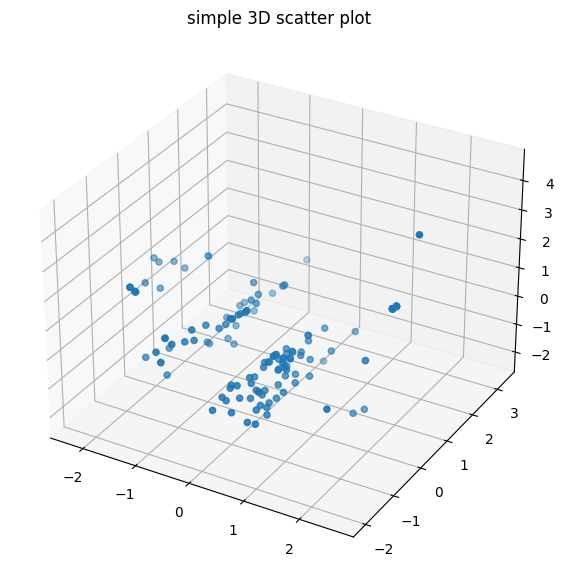

In [129]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly_express as px

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter(scores_df['PC1'], scores_df['PC2'], scores_df['PC3'])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()
fig = px.scatter_3d(scores_df, x='PC1', y = 'PC2', z='PC3', color='type', hover_data=('gene_id', 'transcript_id', 'UTR_type', 'log2FC'))
fig.update_traces(marker=dict(size=2, symbol='circle'))  # Adjust the size value as desired
fig.show()

In [108]:
# show plot
plt.show()
fig = px.scatter(scores_df, x='PC1', y = 'PC2', color='type', hover_data=('gene_id', 'transcript_id', 'UTR_type', 'log2FC'))
fig.update_traces(marker=dict(size=3, symbol='circle'))  # Adjust the size value as desired
fig.show()

In [45]:
# dictionary to map chromosome names to their corresponding adjustment values
chromosome_map = {
    "chr1": 1,
    "chr2": 2,
    "chr3": 3,
    "chr4": 4,
    "chr5": 5,
    "chr6": 6,
    "chr7": 7,
    "chr8": 8,
    "chr9": 9,
    "chr10": 10,
    "chr11": 11,
    "chr12": 12,
    "chr13": 13,
    "chr14": 14,
    "chr15": 15,
    "chr16": 16,
    "chr17": 17,
    "chr18": 18,
    "chr19": 19,
    "chr20": 20,
    "chr21": 21,
    "chr22": 22,
    "chrX": 23,
    "chrY": 24
    }


In [ ]:
# Create a function to retrieve the subtype from dictionary
def get_chr(Chromosome):
    return chromosome_map.get(Chromosome)

# Apply the function to the "filename" column and assign the result to a new column
df['Chr_num'] = df['Chromosome'].apply(get_chr)

# Print the updated DataFrame
df.head()

In [ ]:
strand_map = {
    '-' : -1,
    '+' : 1
}

In [ ]:
# Create a function to retrieve the subtype from dictionary
def get_str(Strand):
    return strand_map.get(Strand)

# Apply the function to the "filename" column and assign the result to a new column
df['Strand_num'] = df['Strand'].apply(get_str)

# Print the updated DataFrame
df.head()

,Chromosome,ExonStart,UTREnd,Strand,Covrage,RefID,RefGeneID,RefUTRStart,RefUTREnd,RefUTRLength,UTRLength,UTRDiff,UTRType,filename,molecularSubtype,Chr_num,Strand_num
0,chr1,151292133,151293033,-,43.966122,NM_001198773.3,PI4KB,151291803,151292851,1048,718,330,shorter,SRR11463564_filtered.csv,triple negative,1,-1
1,chr1,205718179,205718479,-,54.560490,XM_005245453.1,NUCKS1,205713192,205718279,5087,100,4987,shorter,SRR11463564_filtered.csv,triple negative,1,-1
2,chr1,202012850,202016050,+,34.236881,XM_005244942.3,ELF3,202012900,202013036,136,3150,3014,longer,SRR11463564_filtered.csv,triple negative,1,1
3,chr1,150308047,150308447,+,107.424507,NM_031901.6,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,triple negative,1,1
4,chr1,150308047,150308447,+,81.565842,NM_018997.3,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,triple negative,1,1


In [ ]:
subset_data = df[['Chr_num', 'ExonStart', 'UTREnd', 'Strand_num', 'UTRtype_num', 'UTRLength', 'UTRDiff']]
subset_data

,Chr_num,ExonStart,UTREnd,Strand_num,UTRtype_num,UTRLength,UTRDiff
0,1,151292133,151293033,-1,0,718,330
1,1,205718179,205718479,-1,0,100,4987
2,1,202012850,202016050,1,1,3150,3014
3,1,150308047,150308447,1,0,219,532
4,1,150308047,150308447,1,0,219,532
...,...,...,...,...,...,...,...
36186,23,53533111,53533411,-1,0,197,322
36187,23,153929923,153930223,-1,0,63,699
36188,23,53533111,53533411,-1,0,197,322
36189,23,100629686,100629986,-1,1,1111,1072


In [ ]:
X = scale(subset_data)

NameError: name 'scale' is not defined

In [ ]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
scores = pca.transform(X)

In [ ]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,2.288745,-0.833833,0.903618
1,3.664330,-0.143984,0.948306
2,3.647446,1.611781,-1.387567
3,2.223974,-0.831060,-1.072879
4,2.223974,-0.831060,-1.072879
...,...,...,...
36186,-1.423509,-0.502850,0.844903
36187,0.912168,-0.699292,0.710869
36188,-1.423509,-0.502850,0.844903
36189,-0.222621,1.037559,0.449747


In [ ]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=subset_data.columns)
df_loadings

,PC1,PC2,PC3
Chr_num,-0.430531,0.072417,-0.056552
ExonStart,0.632570,-0.065201,-0.038656
UTREnd,0.632570,-0.065198,-0.038656
Strand_num,-0.015661,0.046327,-0.986402
UTRType_binominal,0.016661,0.365626,-0.107595
UTRLength,0.082293,0.679774,0.046570
UTRDiff,0.084018,0.623164,0.084142


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33061548, 0.25109969, 0.14312195])

In [ ]:
explained_variance = np.insert(explained_variance, 0, 0)

In [ ]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [ ]:
pc_df = pd.DataFrame(['', 'PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [ ]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.330615,0.331
2,PC2,0.251100,0.582
3,PC3,0.143122,0.725


In [ ]:

import plotly.express as px

In [ ]:
fig = px.bar(df_explained_variance,
             x='PC', y='Explained Variance')
fig.show()
# fig=plt.bar(data=df_explained_variance,
#             x='PC', height='Explained Variance')
            
# fig

K-means

In [201]:
df = pd.read_csv('pca_concat.csv')

In [202]:
df = df[df['UTR_type']!='no change']

In [210]:
df =df[abs(df['log2FoldChange'])>2]

In [137]:
data = df.loc[:, ["UTR_diff","log2FoldChange"]]
print(data)
x = df['UTR_diff']
y = df['log2FoldChange']
# meta = df.loc[:, ["molecularSubtype", "filename", "reference_id" , "ref_gene_id", "UTR_type"]]
# print(meta)

     UTR_diff  log2FoldChange
0        -140       -2.979559
1        -115        1.534540
2       -1715        1.534540
3       -1559       -2.024827
4        -659       -2.024827
..        ...             ...
937      1075        1.560591
938      -411        0.904830
939      4423        0.764746
940      2161        0.764746
941      -159        2.901077

[942 rows x 2 columns]


C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\natdzi3\AppData\Local\Packages\Pyt

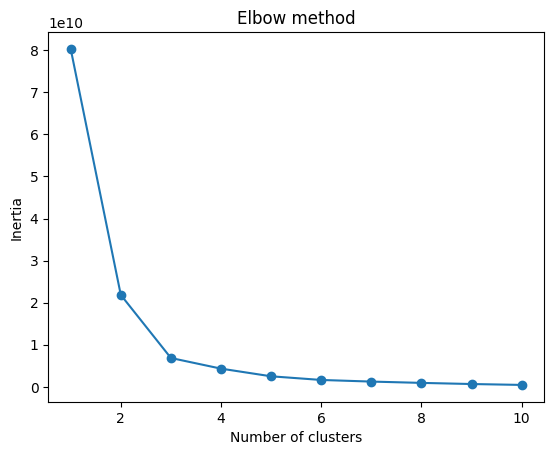

In [138]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



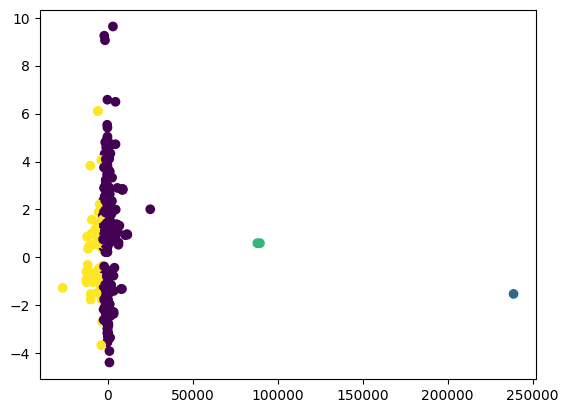

In [139]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

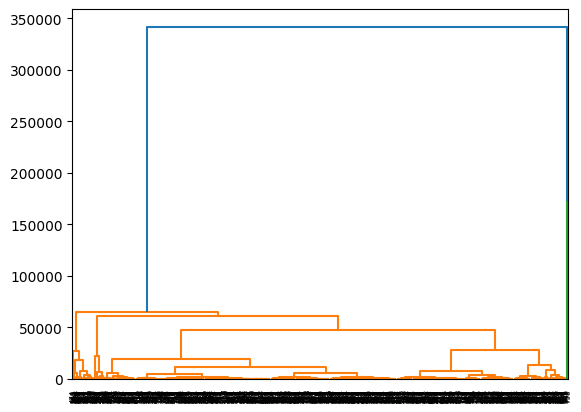

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show() 